# Package Installment

Installation Instructions for the QOT Algorithm Application



*   Please ensure you place the qot_utils_re.py file in the appropriate folder. For Google Colab, placing it under content is sufficient.

*   Additionally, we will install PILOT, which is necessary for subgroup detection within the application. Note that the other sections do not depend on PILOT.




In [1]:
!pip install POT
!pip install hdbscan
!pip install scanpy
!pip install phate
!pip install igraph
!pip install leidenalg
!pip install pydiffmap
!pip install scikit-network
!pip install joypy
!pip install elpigraph-python
!pip install gprofiler-official
!pip install adjustText

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=551d71dd50a9e66a165309b5124fb9301590c0633dc85d26f7455d4465b8f148
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/CostaLab/PILOT

Cloning into 'PILOT'...
remote: Enumerating objects: 1558, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 1558 (delta 80), reused 19 (delta 19), pack-reused 1410 (from 1)
Receiving objects: 100% (1558/1558), 334.02 MiB | 54.67 MiB/s, done.
Resolving deltas: 100% (742/742), done.


In [4]:
cd PILOT

/content/PILOT


In [5]:
!conda create --name PILOT r-base
!conda activate PILOT
!conda install -c conda-forge rpy2
!conda install jupyter
!pip install .

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
Processing /content/PILOT
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 kB 13.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of pilotpy to determine which version is compatible with other requirements. This could take a while.
ERROR: Package 'pilotpy' requires a different Python: 3.10.12 not in '<3.12,>=3.11.5'


In [6]:
import pilotpy as pl
import scanpy as sc

In [20]:
import importlib
import qot_utils_re
importlib.reload(qot_utils_re)
from qot_utils_re import Extract_Info, Gaussian_Mixture_Representation, calculate_qot, visualize_and_evaluate, Run_QOT,trajectory_analysis,select_best_sil,clustering_emd,select_best_sil,compute_diff_expressions,compute_shapley_values,plot_top_gene_contributions,cell_type_diff_two_sub_patient_groups


# Run QOT for sample Level Distance Matrix

Now, we will run the QOT algorithm to obtain the sample-level distance matrix. Please ensure that your dataset is in the correct format.

In [8]:

file_path = '/content/drive/My Drive/PDAC.h5ad'
adata = sc.read_h5ad(file_path)

# Call the processing function
adata = Run_QOT(
    adata,
    gene_matrix='X_pca',
    type_cell='cell_types',
    id_col='sampleID',
    progession='status',
    dataset_type='rna',
    num_components_list=[1],
    random_state=2,
    min_samples_for_gmm=16,
    qot_method="cosine"
)



---Information extracted from the dataset---

---GMM completed in 29.67 seconds---

---QOT calculation completed in 1.40 seconds---


We can also visualize the results.

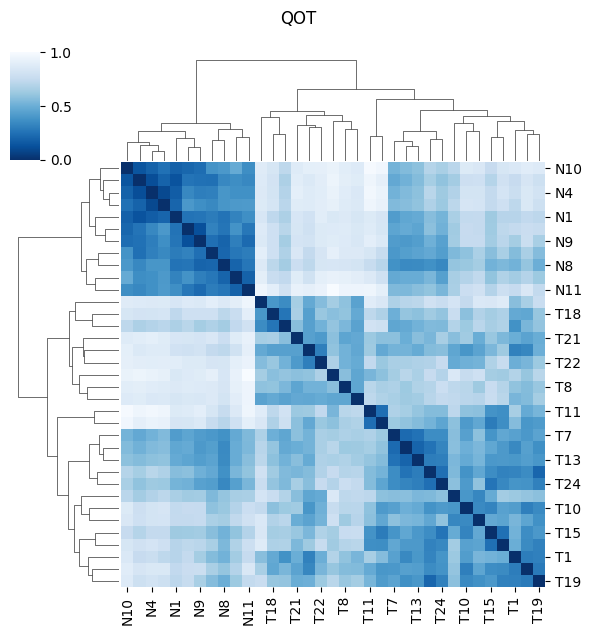

Silhouette Score: 0.35938744926208477
Silhouette Score (PILOT Version): 0.7146459970273847
Evaluation scores obtained: silhouette_score  = 0.35938744926208477, silhouette_score (PILOT) = 0.7146459970273847


In [9]:
# Visualize and evaluate
score_1, score_2 = visualize_and_evaluate(adata)
print(f"Evaluation scores obtained: silhouette_score  = {score_1}, silhouette_score (PILOT) = {score_2}")


# Trajectory Inference

Now, we will perform trajectory analysis by inputting our pre-computed distance matrix into the PHATE algorithm.

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 35 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 12
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.05 seconds.


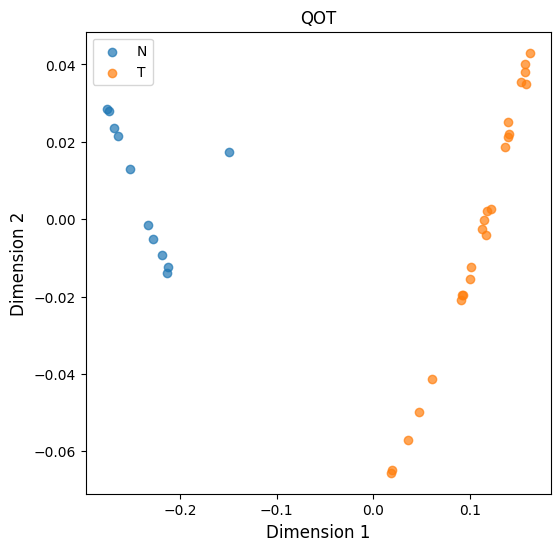

AUCPR: 1.0
Spearman's correlation coefficient: 0.8043996665398438
P-value: 5.813972939783747e-09


In [10]:
trajectory_analysis(adata,knn_number=6,dataset_name = 'PDAC')

# Driven Gene Indentification

For gene-driven identification, we need to specify the level of PCA components used and then rank the genes that help us identify the groups.








In [21]:
top_gene_df=compute_shapley_values(
    adata,
    n_components=5,
    num_components_list=[1],
    random_state=2,
    min_samples_for_gmm=16,
    qot_method="cosine",
    gene_matrix='X_pca',
    type_cell='cell_types',
    id_col='sampleID',
    progression='status',
    dataset_type='rna'
)

---PCA---
---QOT Complete for Base Model---
---Processing leave-out PCA component: 0---
---Processing leave-out PCA component: 1---
---Processing leave-out PCA component: 2---
---Processing leave-out PCA component: 3---
---Processing leave-out PCA component: 4---


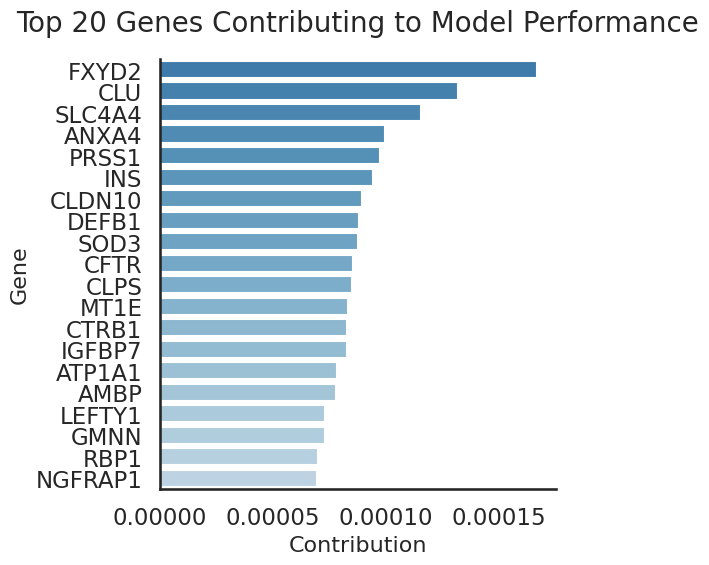

In [22]:
plot_top_gene_contributions(top_gene_df)

# Subgroup Detection

To perform unsupervised subgroup detection, we select the resolution with the highest silhouette score. In this case, a clustering solution with two clusters yields the highest score, effectively separating the disease group (T) from the control group (N). However, to identify additional subgroups within the disease category, we choose a resolution of three clusters.

<Figure size 600x600 with 0 Axes>

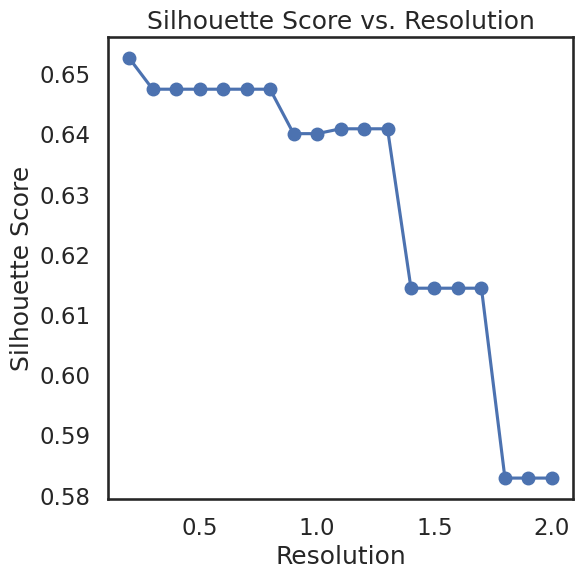

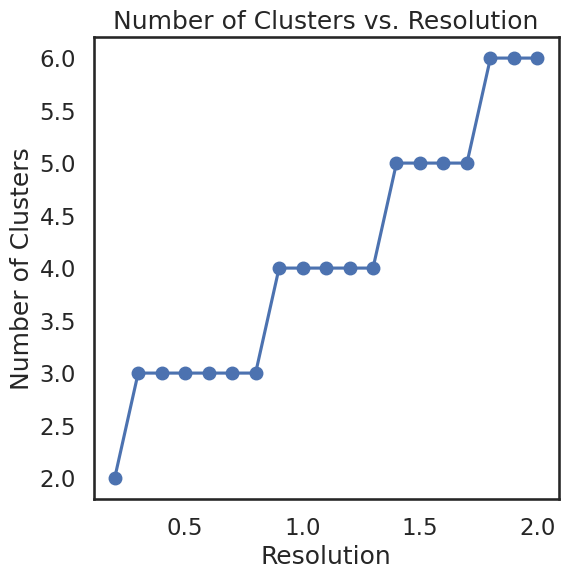

In [13]:
select_best_sil(adata)

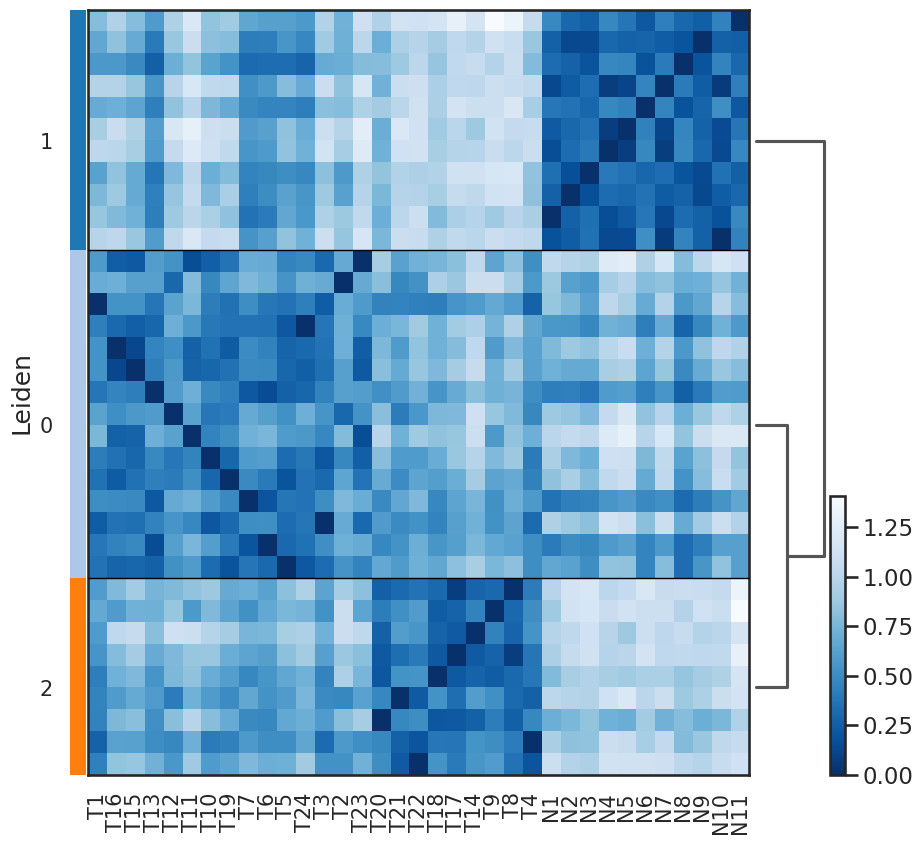

In [14]:
proportion_df = clustering_emd(adata, res = 0.5,figsize=(10,10))

Here we do the change of name for better understanding

In [15]:
proportion_df.loc[proportion_df['Predicted_Labels'] == '0', 'Predicted_Labels'] = 'Tumor 1'
proportion_df.loc[proportion_df['Predicted_Labels'] == '1', 'Predicted_Labels'] = 'Normal'
proportion_df.loc[proportion_df['Predicted_Labels'] == '2', 'Predicted_Labels'] = 'Tumor 2'

Here, we install the necessary packages as indicated by PILOT. For more details, please visit the PILOT GitHub page. Please choose "a" to run the installation commands.

In [16]:
pl.tl.install_r_packages()

Update all/some/none? [a/s/n]: a


First, we identify groups of cells that show significant differences between the two subgroups.








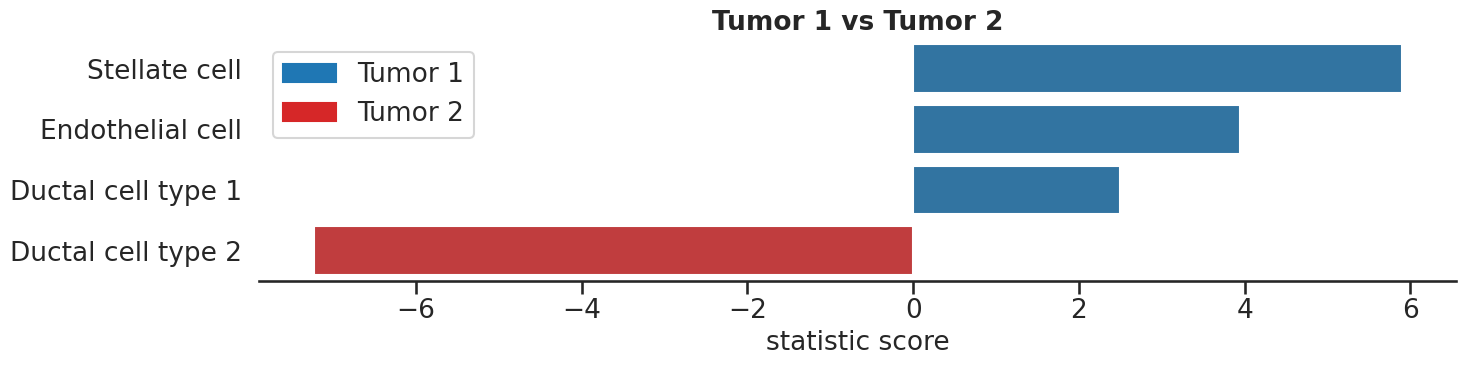

In [17]:
cell_type_diff_two_sub_patient_groups(
    proportion_df,
    proportion_df.columns[2:],
    group1 = 'Tumor 1',
    group2 = 'Tumor 2',
    pval_thr = 0.06,
    figsize = (15, 4)
    )

Then, we analyze which genes are expressed differently among the two subgroups within specific cells.








run limma lmFit
run limma eBayes


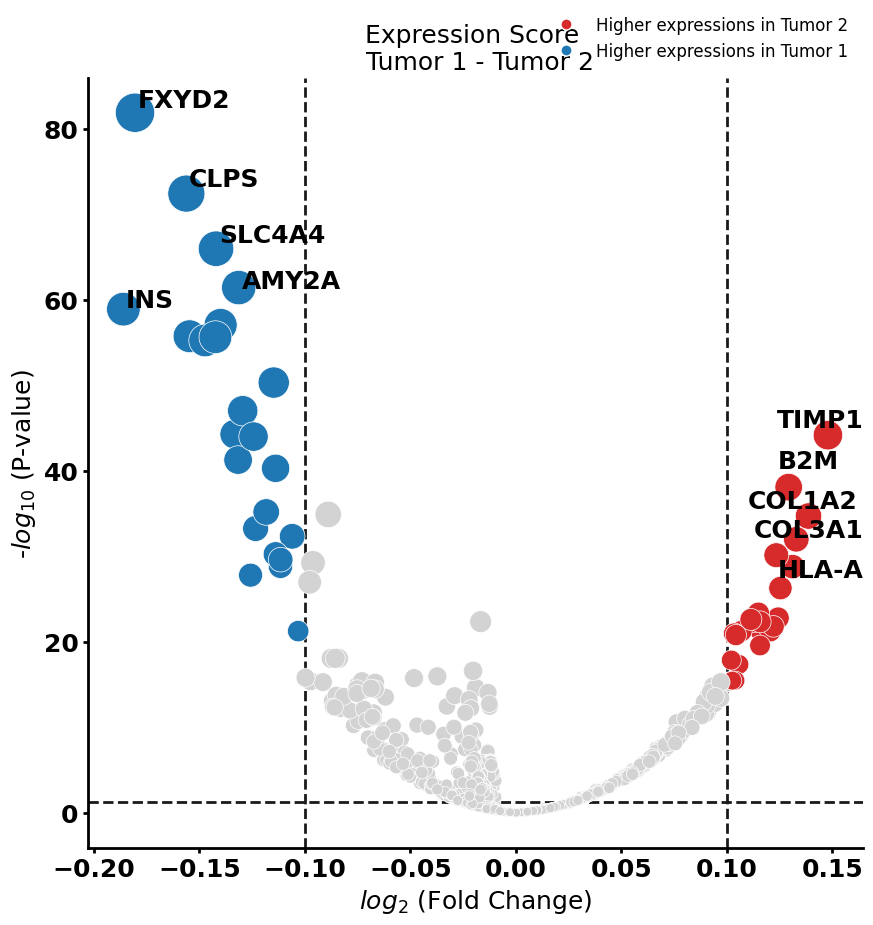

In [18]:
cell_type = "Stellate cell"

compute_diff_expressions(
    adata,
    cell_type,
    proportion_df,
    fc_thr =  0.10,
    pval_thr = 0.05,
    group1 = 'Tumor 1',
    group2 = 'Tumor 2',
    sample_col = 'sampleID',
    col_cell = 'cell_types',
    figsize = (10,10)
    )